In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_housing_data():
    housing = fetch_california_housing()
    data = housing.data
    target = housing.target

    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [3]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [4]:
def train_regressor(model, X_train, y_train, criterion, optimizer, num_epochs=10):
    loss_values = []

    for epoch in range(num_epochs):
        model.train()

        inputs = torch.tensor(X_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Loss Function Over Epochs')
    plt.legend()
    plt.show()

In [5]:
def test_regressor(model, X_test, y_test):
    model.eval()

    inputs = torch.tensor(X_test, dtype=torch.float32)

    predictions = model(inputs).detach().numpy().flatten()
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error on Test Data: {mse:.4f}")


Epoch [1/80], Loss: 5.2600
Epoch [2/80], Loss: 5.1806
Epoch [3/80], Loss: 5.1022
Epoch [4/80], Loss: 5.0248
Epoch [5/80], Loss: 4.9485
Epoch [6/80], Loss: 4.8732
Epoch [7/80], Loss: 4.7990
Epoch [8/80], Loss: 4.7258
Epoch [9/80], Loss: 4.6536
Epoch [10/80], Loss: 4.5825
Epoch [11/80], Loss: 4.5124
Epoch [12/80], Loss: 4.4433
Epoch [13/80], Loss: 4.3752
Epoch [14/80], Loss: 4.3081
Epoch [15/80], Loss: 4.2421
Epoch [16/80], Loss: 4.1770
Epoch [17/80], Loss: 4.1129
Epoch [18/80], Loss: 4.0498
Epoch [19/80], Loss: 3.9876
Epoch [20/80], Loss: 3.9264
Epoch [21/80], Loss: 3.8661
Epoch [22/80], Loss: 3.8068
Epoch [23/80], Loss: 3.7483
Epoch [24/80], Loss: 3.6908
Epoch [25/80], Loss: 3.6341
Epoch [26/80], Loss: 3.5783
Epoch [27/80], Loss: 3.5234
Epoch [28/80], Loss: 3.4693
Epoch [29/80], Loss: 3.4161
Epoch [30/80], Loss: 3.3636
Epoch [31/80], Loss: 3.3120
Epoch [32/80], Loss: 3.2611
Epoch [33/80], Loss: 3.2111
Epoch [34/80], Loss: 3.1617
Epoch [35/80], Loss: 3.1132
Epoch [36/80], Loss: 3.0653
E

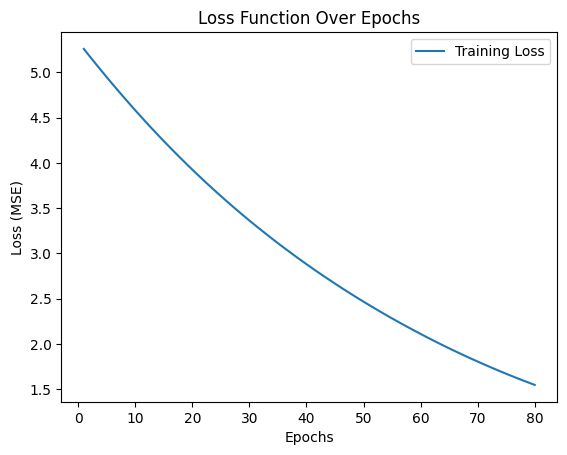

Mean Squared Error on Test Data: 1.4805


In [8]:
if __name__ == '__main__':
    X_train, X_test, y_train, y_test = load_housing_data()

    input_size = X_train.shape[1]
    hidden_size = 64
    learning_rate = 0.001

    model = MLP(input_size, hidden_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_regressor(model, X_train, y_train, criterion, optimizer, num_epochs=100)

    test_regressor(model, X_test, y_test)